In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import torch
import pickle
from sklearn.metrics import confusion_matrix
sys.path.append('..')
from config import experiments_dir

In [7]:
exp_dir = os.path.join(experiments_dir, 'ResNet50-96')

with open(os.path.join(exp_dir, 'nlst_test_set'), 'rb') as f:
    test_set = pickle.load(f)
    
preds = pd.read_csv(os.path.join(exp_dir, 'nlst_preds.csv'))

In [8]:
print(preds)

      Unnamed: 0  g_hat  c_hat
0              0      0      0
1              1      0      0
2              2      0      0
3              3      0      0
4              4      0      0
...          ...    ...    ...
1131        1131      0      0
1132        1132      2      1
1133        1133      0      0
1134        1134      0      0
1135        1135      0      0

[1136 rows x 3 columns]


In [9]:
grades_true = test_set.grades
grades_pred = list(preds['g_hat'])
cases_pred = list(preds['c_hat'])

In [10]:
cf_matrix = confusion_matrix(grades_true, grades_pred).T  
print(cf_matrix)

df_cm = pd.DataFrame(cf_matrix, index = [i for i in ['Healthy', 'Mild', 'Moderate', 'Severe']],
                  columns = [i for i in ['Healthy', 'Mild', 'Moderate', 'Severe']])

[[1063   41   12    0]
 [  12    1    0    0]
 [   3    1    2    1]
 [   0    0    0    0]]


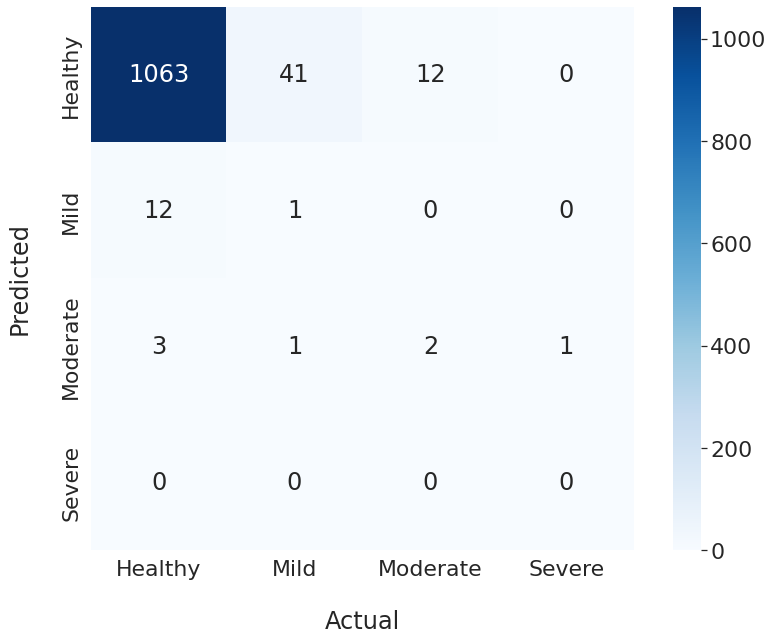

In [14]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=2) 
sns.heatmap(df_cm, annot=True, cmap="Blues", square=True, fmt='d')
plt.gca().set_yticklabels(labels=['Healthy', 'Mild', 'Moderate', 'Severe'], va='center')
plt.gca().set_ylabel('Predicted', labelpad=30)
plt.gca().set_xlabel('Actual', labelpad=30)
plt.savefig('plots/confusion_matrix_grades.png', bbox_inches='tight')
plt.show()

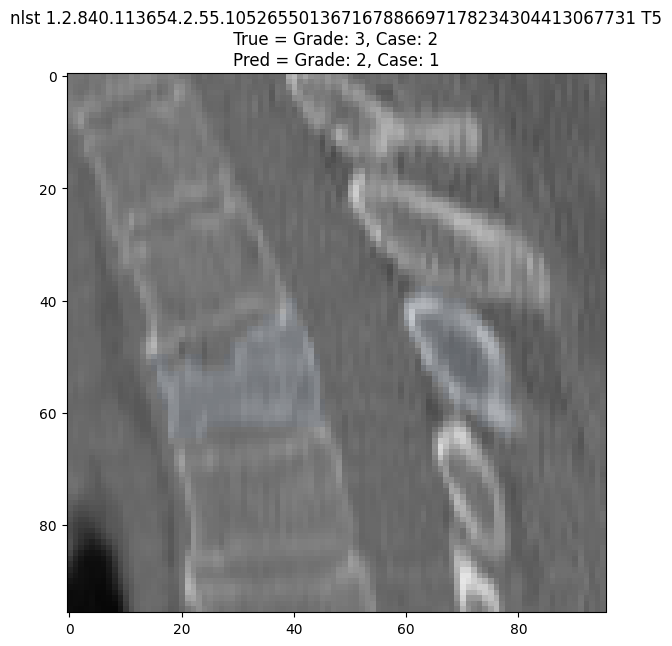

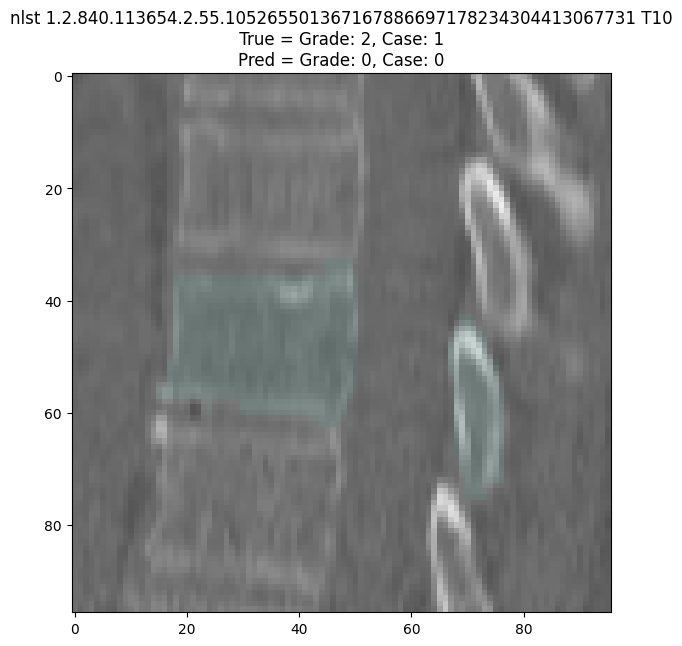

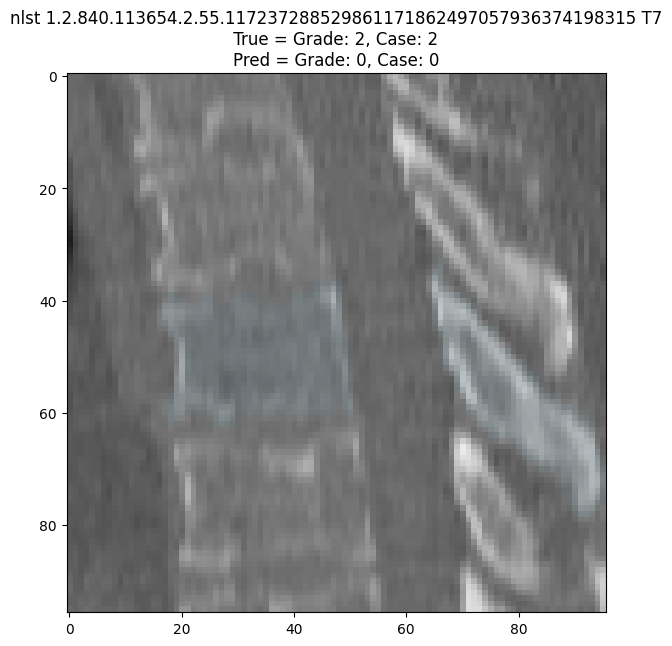

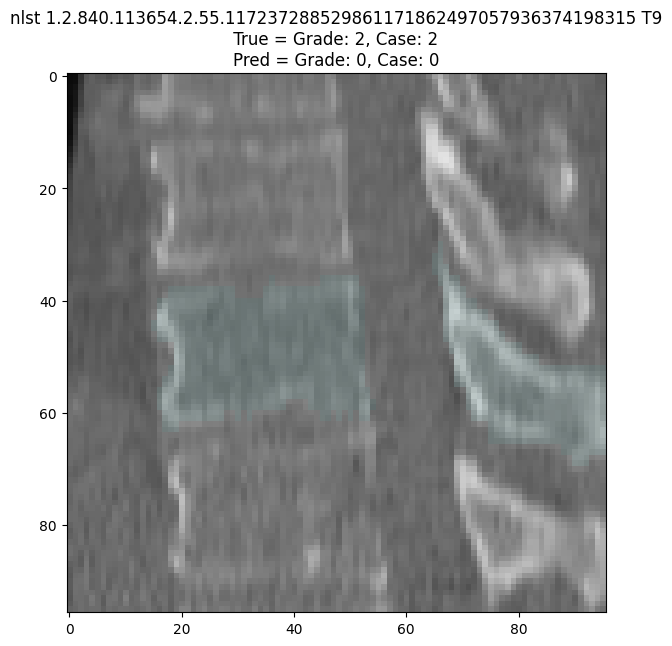

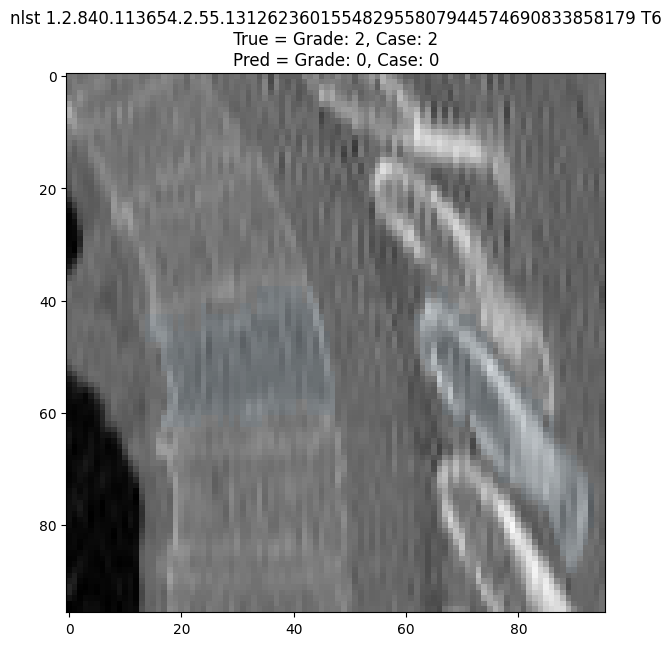

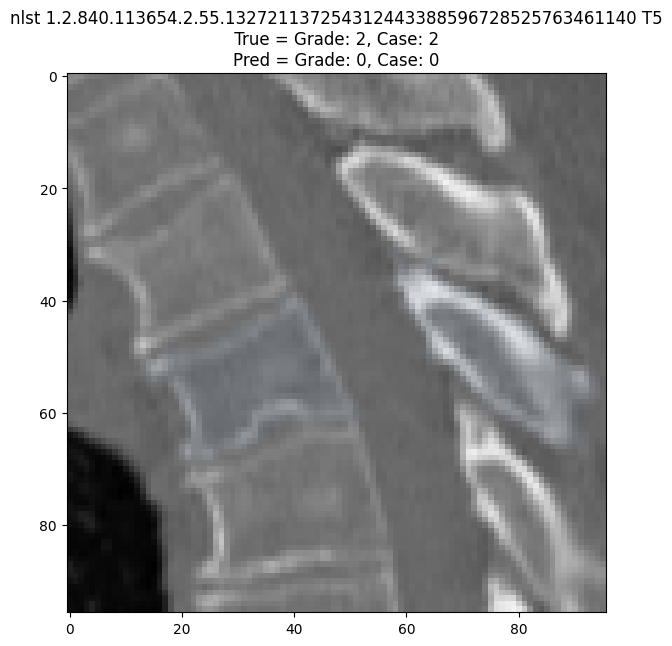

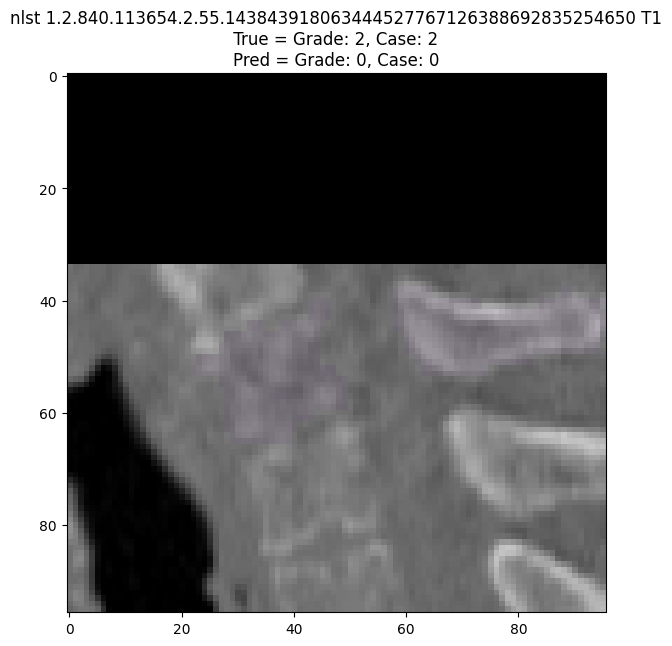

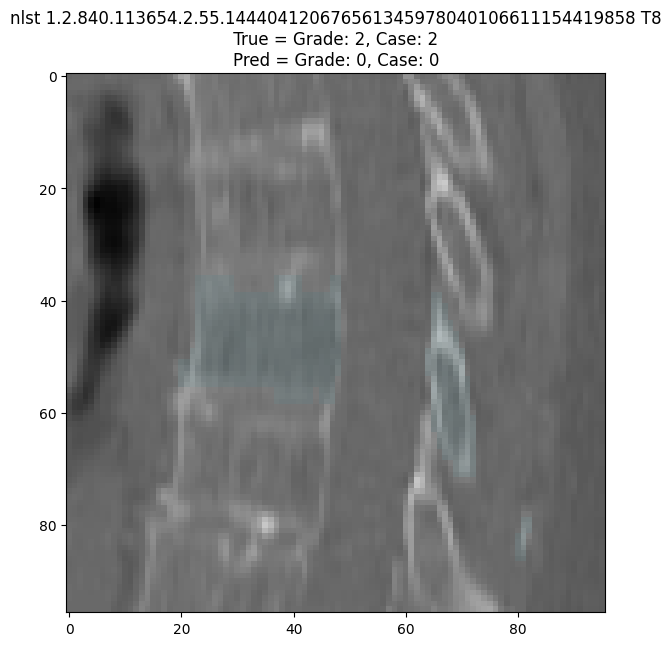

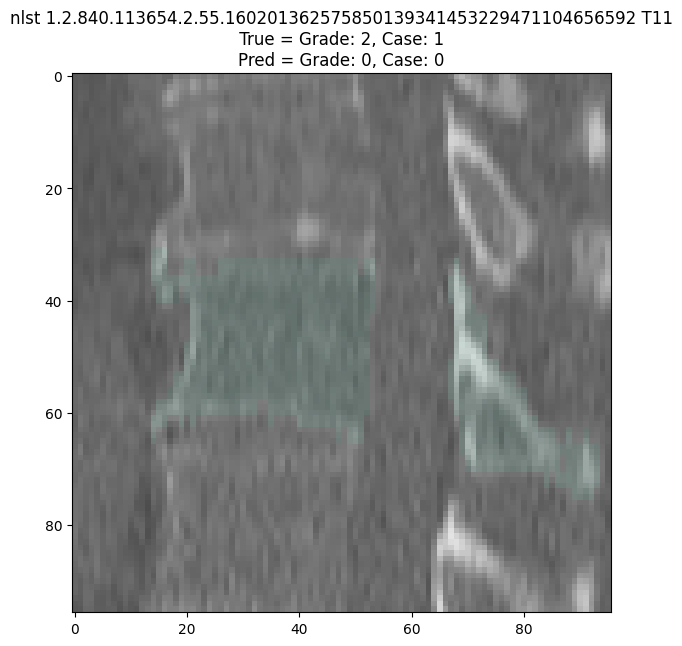

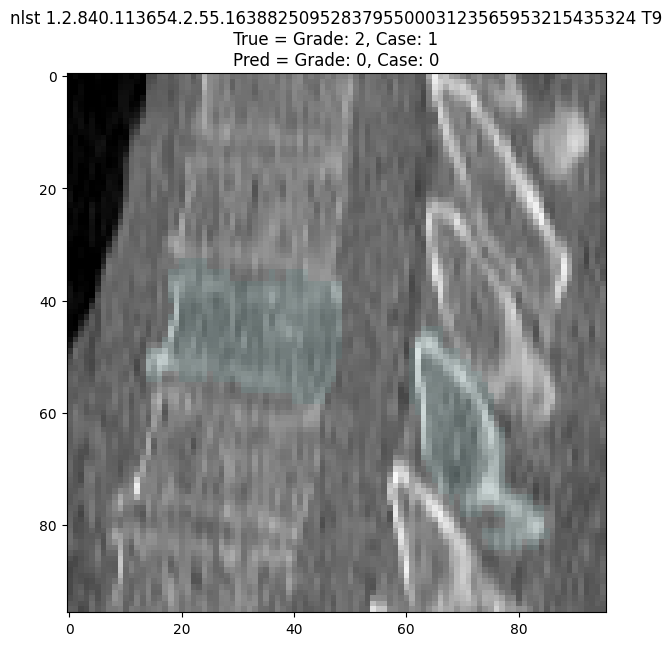

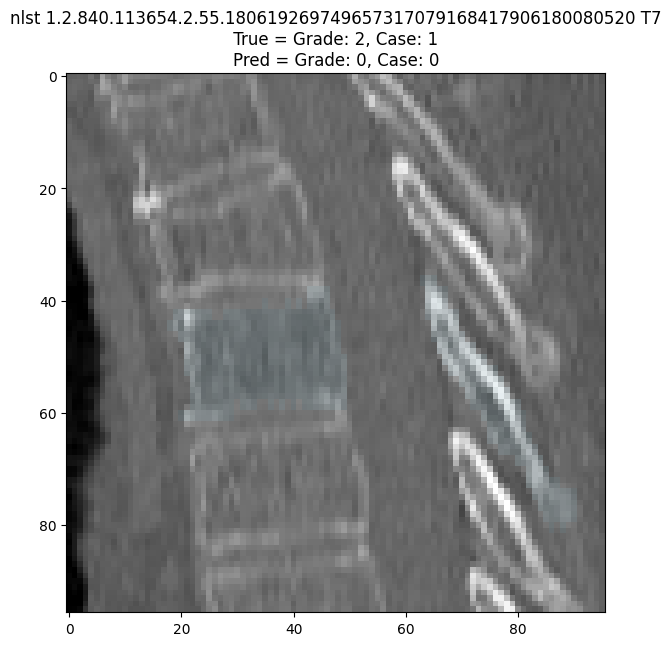

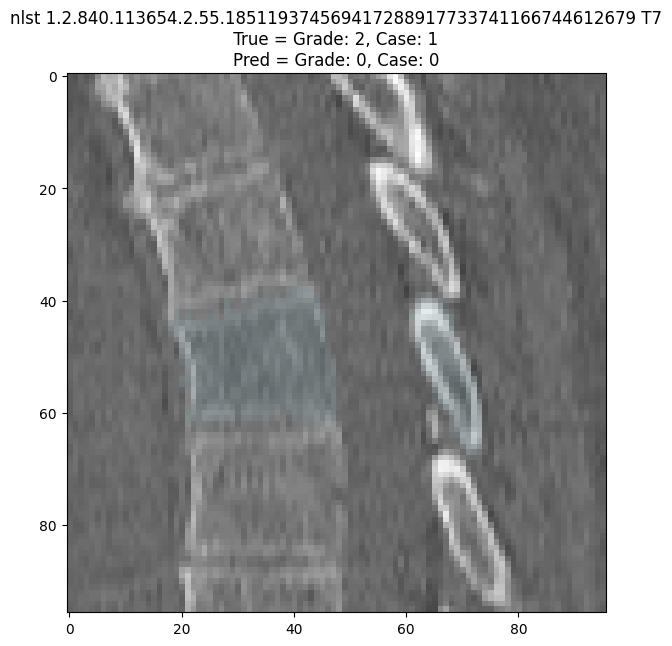

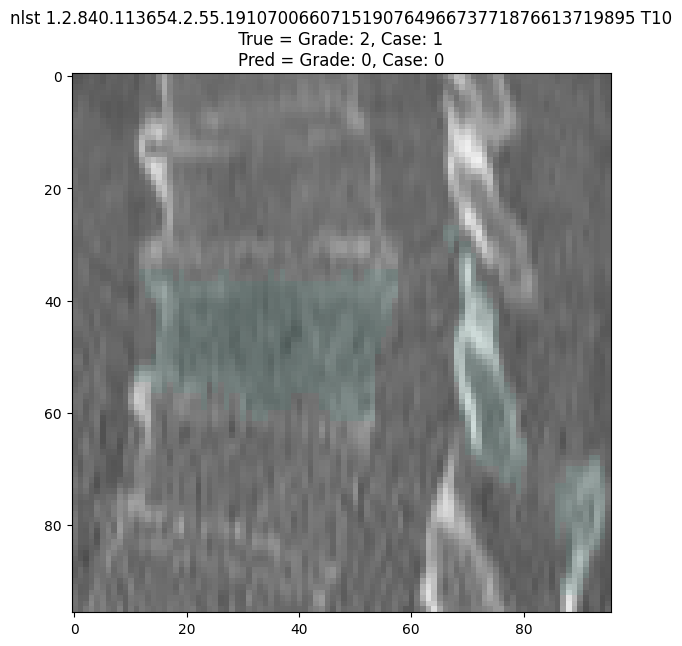

13


In [22]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
errors = 0

for i in range(len(grades_pred)): 
    img = test_set.img_patches[i]
    msk = test_set.msk_patches[i]
    grade_true = test_set.grades[i]
    grade_pred = grades_pred[i]
    case_pred = cases_pred[i]
    case = test_set.cases[i]

    ID = test_set.IDS[i]
    dataset = test_set.sources[i]
    vert = test_set.vertebrae[i]
    vert_names = np.asarray(['T{}'.format(i) for i in range(1, 13)] + ['L{}'.format(i) for i in range(1, 7)])
    grade_names = ['Healthy', 'Mild', 'Moderate', 'Severe']
    case_names = ['Healthy', 'Wedge', 'Bioconcave', 'Crush']
    
    if (grade_pred != grade_true) & (grade_true >= 2):

        
        errors += 1
        plt.figure(figsize=(7, 7))
        mid_slice = img.shape[0] // 2 
        msk = np.ma.masked_where(msk == 0, msk)
        plt.imshow(img[mid_slice, 8:104, 8:104], cmap='gray', vmin=0, vmax=1)
        plt.imshow(msk[mid_slice, 8:104, 8:104], alpha=0.1, vmin=0, vmax=1)
        plt.title('{} {} {}\n True = Grade: {}, Case: {} \nPred = Grade: {}, Case: {}'.format(dataset, ID, vert_names[vert-1], int(grade_true), int(case), grade_pred, case_pred))
        plt.savefig('plots/miss_predict{}.png'.format(errors), bbox_inches='tight')
        plt.show()

print(errors)